Title of VRU paper and author list
Under peer review


This is a JUPYTER notebook that explains and run the computer R code associated with this paper.  The code itself is available for download adn inspection from this interface or directly at GitHub (URL:) 

In [1]:
#Load required libraries
base_dir <- getwd()
source("scripts/required_libraries.R")

oro.dicom 0.5.3

Modules imported successfully.



The following cell runs a function to decompress CT image  zip file and place the decompressed file is a data folder that whic will be accessed by later cells.  The demo zim file contains 3 sample images, a transverse CT image in the region of the left kidney, and the image immediately cranial and immediately caudal.  With 3 images the central image has an index position 2 in the stack. 

The code can run on your images- From your CT scan select the image that includes the left renal pelvis and the two adjacent images.  Compress these three images to a ".zip" file, and place that file in the directory "user_zip_files".  You should then change the code below to specify the correct file path (i.e. change (base_dir,"zip_files","demo_images.zip") to read (base_dir,"user_zip_files","NAME OF YOUR ZIP FILE.zip")  

readDICOM is a function in R that opens DICOM files.

In [2]:
#Load images
unzip(file.path(base_dir,"zip_files","demo_images.zip"), exdir = file.path(base_dir,"data_folder"))
dcmImages= readDICOM(file.path(base_dir,"data_folder"),verbose=TRUE, recursive=TRUE )

  3 files to be processed by readDICOM()
  |======================================================================| 100%


The following loads text files that specify variables, such as the CT range appropriate for fat, and variable that rae extracted from the DICOM header , e.g. rescale_slope and rescale_intercept, wariables used to convert the image pixel values to CT Numbers (Hounsfield units).   

Multiple functions are loaded so that can be used in the cells that follow. All functions can be inspected on ths site by looking through the uploaded directories.

In [3]:
# Load setup functions and variables

source("scripts/variables.R")

source ("functions/fn_count_fat_plus_lean_voxels_single_slice.R")
source ("functions/fn_count_fat_plus_lean_voxels_all_slices.R")
source ("functions/fn_count_fat_voxels_single_slice.R")
source ("functions/fn_delete_folder_contents.R")
source ("functions/fn_estimate_fat_percent_lt_kidney.R")
source ("functions/fn_plot_voxel_frequencies.R")

## Other soutrce files source("scripts/setParams.R")

Variables imported successfully.

Functions imported successfully.

Functions imported successfully.

Functions imported successfully.

Functions imported successfully.

Functions imported successfully.

Functions imported successfully.



The following cell displays the slice specified as left renal. 

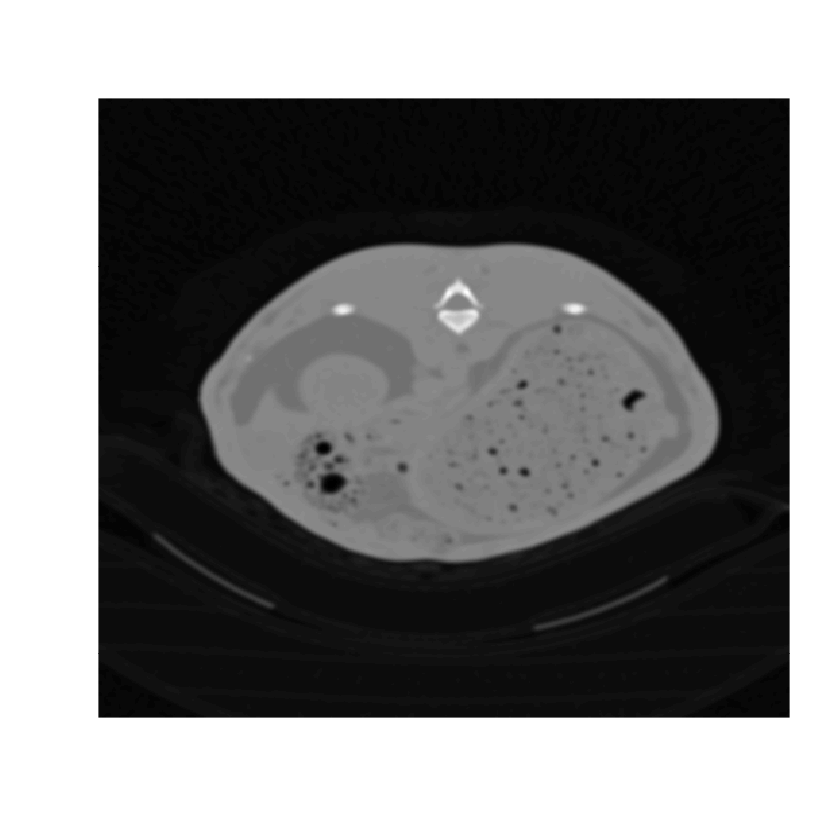

In [4]:
lt_kidney_slice <- 2

img <- (t(dcmImages$img[[lt_kidney_slice]]))
img_flipped <- img[nrow(img):1,]  # Flip the image matrix horizontally
image(1:ncol(img_flipped), 1:nrow(img_flipped), (img_flipped), col = grey(0:64/64), axes = FALSE, xlab = "", ylab = "")

The next cell, calls the function "count_fat_voxles_lt_kidney" .  This function moves through voxel  by voxel in the central image of the stack. If its CT number and all 26 adjacent voxels fall in the range expected for fat, the voxel is included in the count of fat voxels.  If these conditions are not met, then the code moves to the next voxel and repeats the assessmet. The function outputs the total umber of voxels classified as represnting fat.    

In [5]:
##Count all fat voxels in the left kidney
fat_voxel_count <- count_fat_voxels_lt_kidney_slice(2)
fat_voxel_count

  |======================================================================| 100%

[1] 8355

The following cell, make a simple count of all voxles in the slice that fall in the range for fat and lean tissue (-250 to 200 HU)

In [6]:
fat_plus_lean_voxel_count <- count_all_voxels_single_slice(2)
fat_plus_lean_voxel_count

[1] 73174

The function below plots the number of fat voxels and the number of combined fat and lean voxels. 

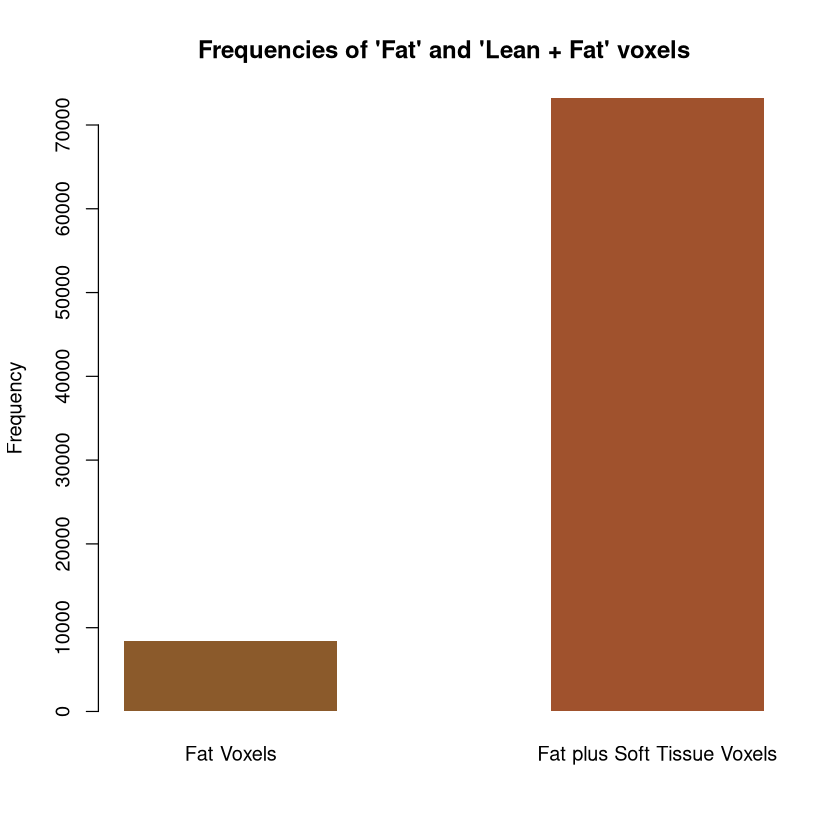

In [7]:
plot_voxel_frequencies(fat_voxel_count,fat_plus_lean_voxel_count)

Finally, the function below uses the linear function described in the paper, to convert the Fat % calculated by CT to a prediction of the Fat % calculated by the chemical analysis.

In [8]:
estimate_fat_percent_lt_kidney_slice(fat_voxel_count,fat_plus_lean_voxel_count)

[1] 3.298729